In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import pandas_datareader.data as web
import yfinance as yf
import datetime
import matplotlib.pyplot as plt # for plots
import seaborn as sns
%matplotlib inline

In [2]:
#fetching data from S&P 500 index using yfinance api
sp500_df = yf.download('^GSPC', start = datetime.datetime(1994, 7, 9), end = datetime.datetime(2024, 7, 9))

[*********************100%%**********************]  1 of 1 completed


In [3]:
#performing some preliminary data checks
sp500_df.dtypes
sp500_df.isna().sum();

In [4]:
#calculating rolling averages and standard deviations at different windows
sandp = sp500_df.High
roll_avg_10 = sp500_df.High.rolling(window=10).mean()
roll_avg_30 = sp500_df.High.rolling(window=30).mean()
roll_avg_70 = sp500_df.High.rolling(window=70).mean()
roll_std_30 = sp500_df.High.rolling(window=30).std()

[Text(0.5, 0, 'Date'), Text(0, 0.5, 'S&P 500')]

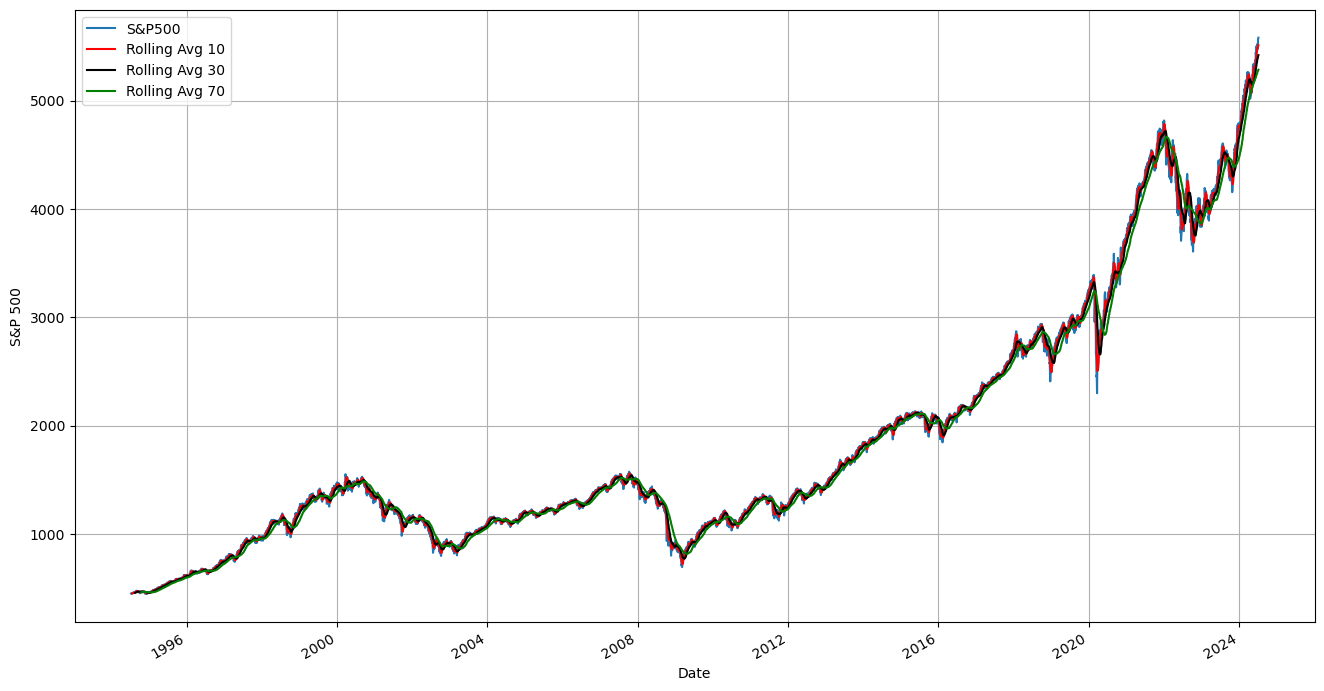

In [5]:
#plotting the rolling average and actual sandp values in a graph for comparison
fig, ax = plt.subplots(figsize=(16, 9))
fig.autofmt_xdate()
ax.plot(sandp, label='S&P500', color='tab:blue')
ax.plot(roll_avg_10, label='Rolling Avg 10', color='r')
ax.plot(roll_avg_30, label='Rolling Avg 30', color='k')
ax.plot(roll_avg_70, label='Rolling Avg 70', color='g')
#ax.plot(roll_std_30, label='Rolling Avg 70', color='b')
ax.legend()
ax.grid()
ax.set(xlabel='Date',ylabel='S&P 500')

In [6]:
#extracting the stock information of the top 5% of s and p 500 index.
sp500_top_25_tickers = [
    "AAPL",   # Apple Inc.
    "MSFT",   # Microsoft Corporation
    "GOOGL",  # Alphabet Inc. Class A
    "GOOG",   # Alphabet Inc. Class C
    "AMZN",   # Amazon.com Inc.
    "META",   # Meta Platforms, Inc. (formerly Facebook)
    "TSLA",   # Tesla, Inc.
    "BRK.B",  # Berkshire Hathaway Inc.
    "NVDA",   # NVIDIA Corporation
    "JNJ",    # Johnson & Johnson
    "V",      # Visa Inc.
    "JPM",    # JPMorgan Chase & Co.
    "PG",     # Procter & Gamble Co.
    "UNH",    # UnitedHealth Group Incorporated
    "HD",     # Home Depot, Inc.
    "PYPL",   # PayPal Holdings, Inc.
    "MA",     # Mastercard Incorporated
    "NSRGY",  # Nestlé S.A. ADR
    "TSM",    # Taiwan Semiconductor Manufacturing Company Limited ADR
    "ADBE",   # Adobe Inc.
    "WMT",    # Walmart Inc.
    "RHHBY",  # Roche Holding AG ADR
    "PFE",    # Pfizer Inc.
    "CMCSA",  # Comcast Corporation
    "NFLX"    # Netflix, Inc.
]
top25_df = pd.DataFrame()
for stock in sp500_top_25_tickers:
    df25 = yf.download(stock, start = datetime.datetime(1994, 7, 9), end = datetime.datetime(2024, 7, 9))
    top25_df[stock] = df25['Adj Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['BRK.B']: YFTzMissingError('$%ticker%: possibly delisted; No timezone found')
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[***

In [7]:
top25_df.isna().sum();

In [8]:
#calculating the average of the indexes
top25_df['average'] = top25_df.mean(axis = 1)
top25_df['average'];

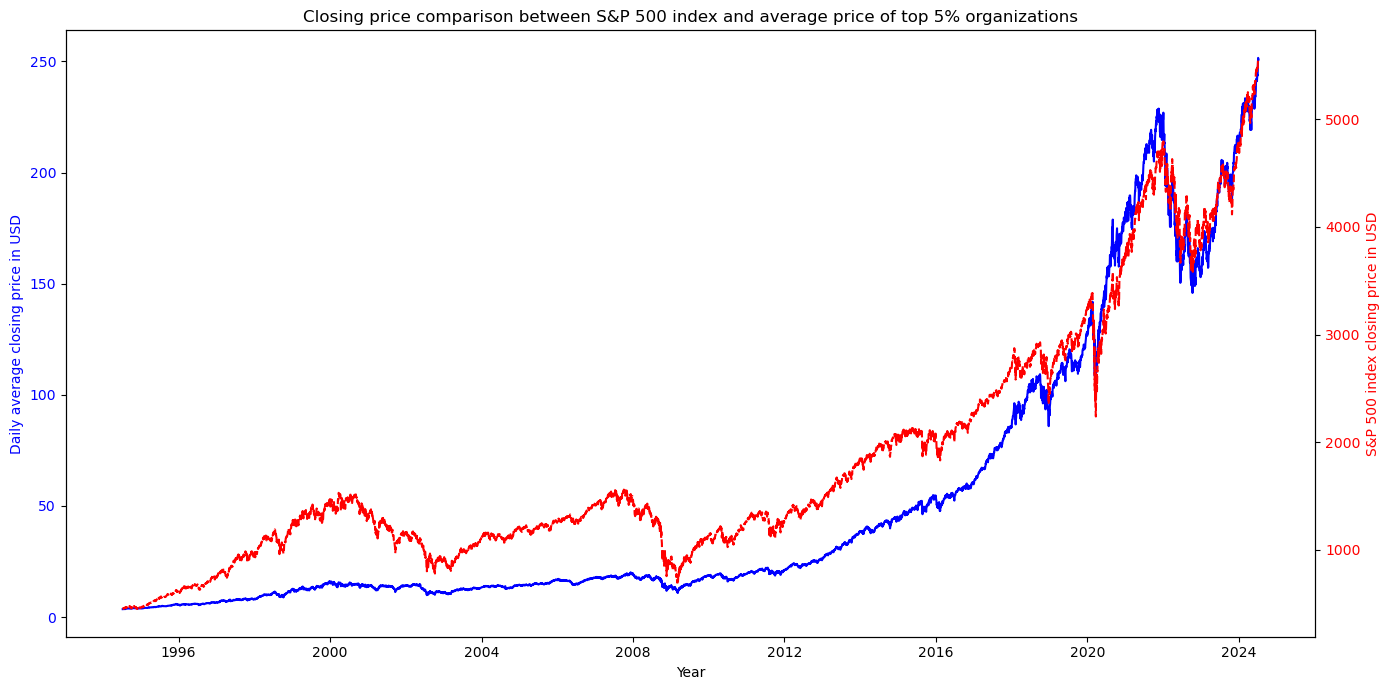

In [9]:
#Average Daily Adjusted Close Price Comparison with S&P 500 Index
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(14, 7))

ax1.plot(top25_df.index, top25_df['average'], label='Average of All Companies', color='b')
ax1.set_xlabel('Year')
ax1.set_ylabel('Daily average closing price in USD', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
ax2.plot(sp500_df.index, sp500_df['Adj Close'], label='S&P 500 Index', color='r', linestyle='--')
ax2.set_ylabel('S&P 500 index closing price in USD', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('Closing price comparison between S&P 500 index and average price of top 5% organizations')
fig.tight_layout()
plt.show()

In [10]:
#extracting the stock information of the bottom 5% of s and p 500 index.
import yfinance as yf
import pandas as pd

sp500_last_25_tickers = [
    "CMI",     # Cummins Inc.
    "AEP",     # American Electric Power Company, Inc.
    "PSA",     # Public Storage
    "ICE",     # Intercontinental Exchange, Inc.
    "SO",      # Southern Company
    "HCA",     # HCA Healthcare, Inc.
    "PLD",     # Prologis, Inc.
    "FISV",    # Fiserv, Inc.
    "EL",      # The Estée Lauder Companies Inc.
    "PRU",     # Prudential Financial, Inc.
    "CCI",     # Crown Castle International Corp.
    "MET",     # MetLife, Inc.
    "PNC",     # The PNC Financial Services Group, Inc.
    "COST",    # Costco Wholesale Corporation
    "LHX",     # L3Harris Technologies, Inc.
    "BDX",     # Becton, Dickinson and Company
    "AON",     # Aon plc
    "SBUX",    # Starbucks Corporation
    "GS",      # The Goldman Sachs Group, Inc.
    "DHR",     # Danaher Corporation
    "MMM",     # 3M Company
    "T",       # AT&T Inc.
    "BKNG",    # Booking Holdings Inc.
    "CVX",     # Chevron Corporation
    "NKE"      # NIKE, Inc.
]
last25_df = pd.DataFrame()
for stock in sp500_last_25_tickers:
    df25 = yf.download(stock, start = datetime.datetime(1994, 7, 9), end = datetime.datetime(2024, 7, 9))
    last25_df[stock] = df25['Adj Close']


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [11]:
last25_df['average'] = last25_df.mean(axis = 1)
last25_df['average'];

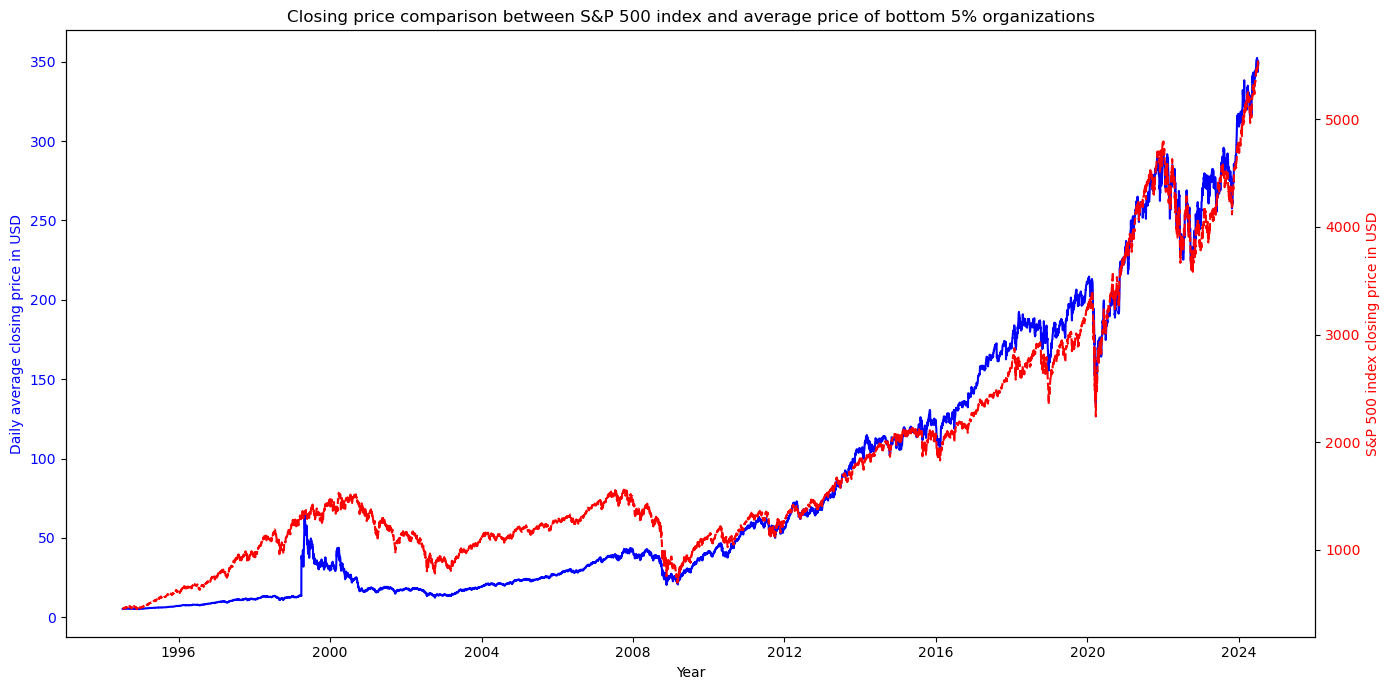

In [12]:
#Average Daily Adjusted Close Price Comparison with S&P 500 Index
import matplotlib.pyplot as plt

# Plotting with dual axes
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot average daily adjusted close price of all companies
ax1.plot(last25_df.index, last25_df['average'], label='Average of All Companies', color='b')
ax1.set_xlabel('Year')
ax1.set_ylabel('Daily average closing price in USD', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a secondary y-axis for S&P 500 index
ax2 = ax1.twinx()
ax2.plot(sp500_df.index, sp500_df['Adj Close'], label='S&P 500 Index', color='r', linestyle='--')
ax2.set_ylabel('S&P 500 index closing price in USD', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Add title and legends
plt.title('Closing price comparison between S&P 500 index and average price of bottom 5% organizations')
fig.tight_layout()
plt.show()

Text(0.5, 1.0, 'Different rolling averages window comparison')

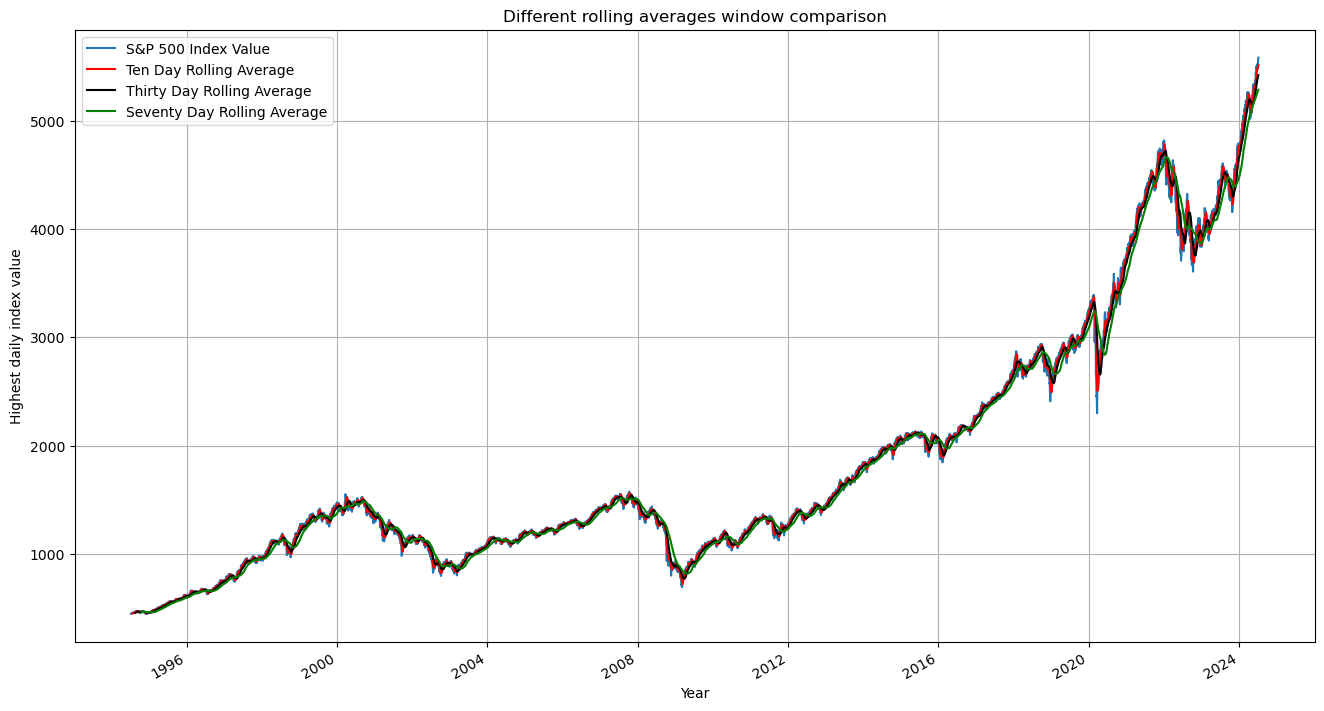

In [13]:
#creating rolling averages wirh different windows
sandp = sp500_df.High
roll_avg_10 = sp500_df.High.rolling(window=10).mean()
roll_avg_30 = sp500_df.High.rolling(window=30).mean()
roll_avg_70 = sp500_df.High.rolling(window=70).mean()
roll_std_30 = sp500_df.High.rolling(window=30).std()

fig, ax = plt.subplots(figsize=(16, 9))
fig.autofmt_xdate()
ax.plot(sandp, label='S&P 500 Index Value', color='tab:blue')
ax.plot(roll_avg_10, label='Ten Day Rolling Average', color='r')
ax.plot(roll_avg_30, label='Thirty Day Rolling Average', color='k')
ax.plot(roll_avg_70, label='Seventy Day Rolling Average', color='g')
#ax.plot(roll_std_30, label='Rolling Avg 70', color='b')
ax.legend()
ax.grid()
ax.set(xlabel='Year',ylabel='Highest daily index value')
plt.title('Different rolling averages window comparison')

In [14]:
#performing Augmented Dickey-Fuller test
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

result = adfuller(sp500_df['High'])

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 2.557158
p-value: 0.999066
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


In [15]:
'''
Null hypothesis is true. The values are not stationary
'''

'\nNull hypothesis is true. The values are not stationary\n'

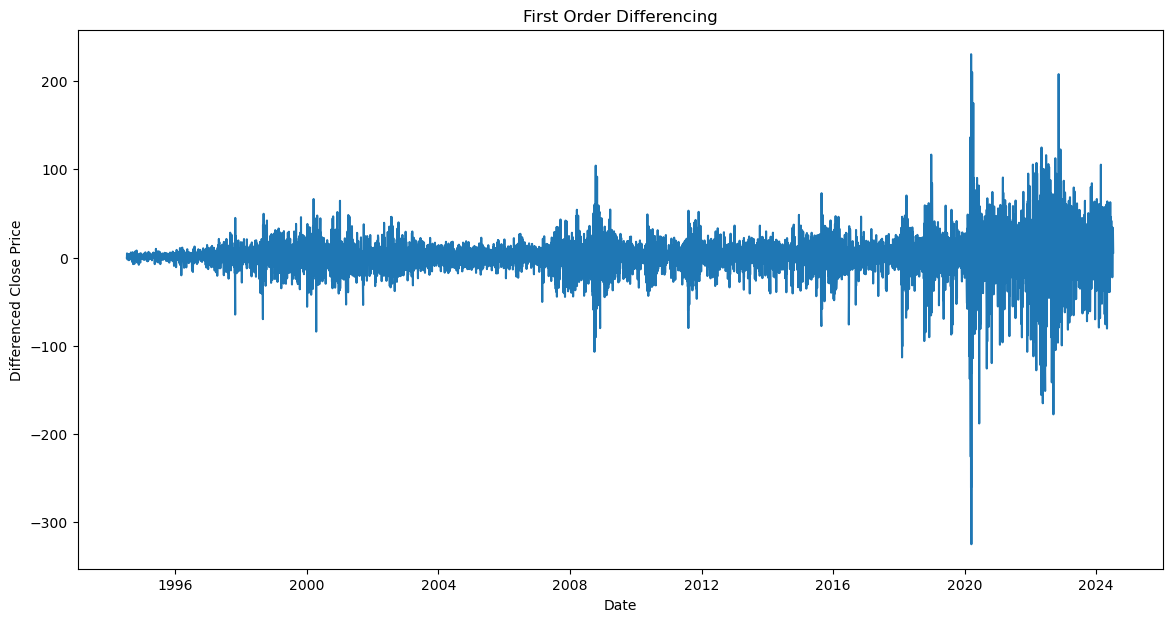

ADF Statistic (First Differenced): -14.978215742109528
p-value (First Differenced): 1.1726313397445415e-27


In [16]:
#first order differencing
sp500_df['Close_diff1'] = sp500_df['Close'].diff()

#drop missing values created by differencing
data_diff1 = sp500_df['Close_diff1'].dropna()

#plot differenced series
plt.figure(figsize=(14, 7))
plt.plot(data_diff1)
plt.title('First Order Differencing')
plt.xlabel('Date')
plt.ylabel('Differenced Close Price')
plt.show()

#check stationarity
from statsmodels.tsa.stattools import adfuller

adf_test_diff1 = adfuller(data_diff1)
print('ADF Statistic (First Differenced):', adf_test_diff1[0])
print('p-value (First Differenced):', adf_test_diff1[1])


In [17]:
'''
Null hypothesis is false. The values are stationary
'''

'\nNull hypothesis is false. The values are stationary\n'

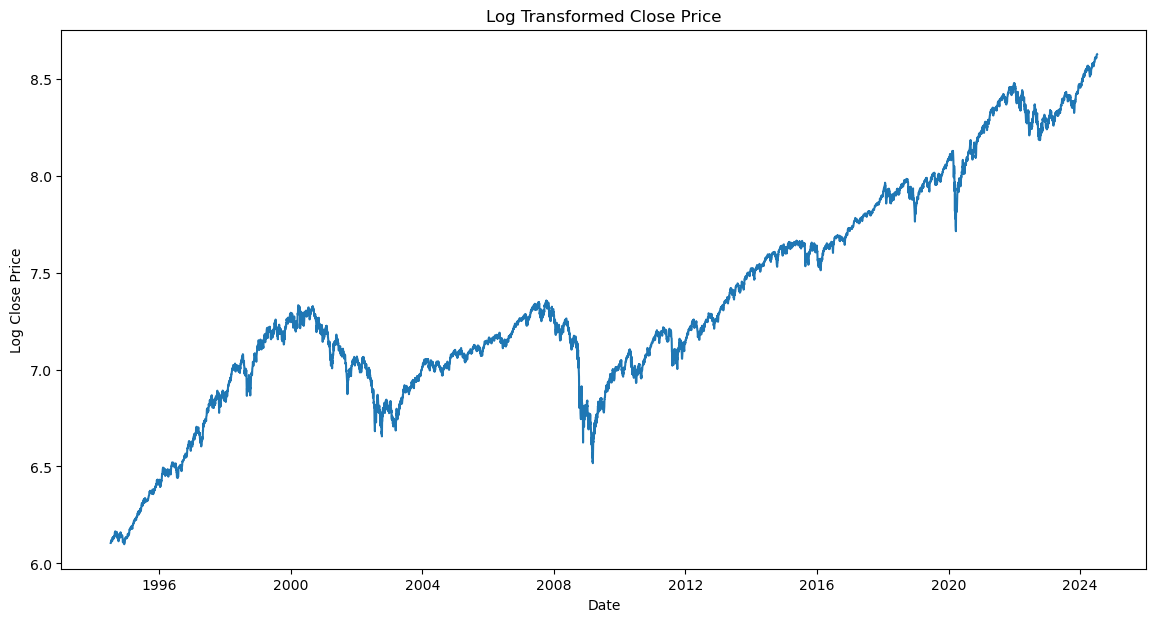

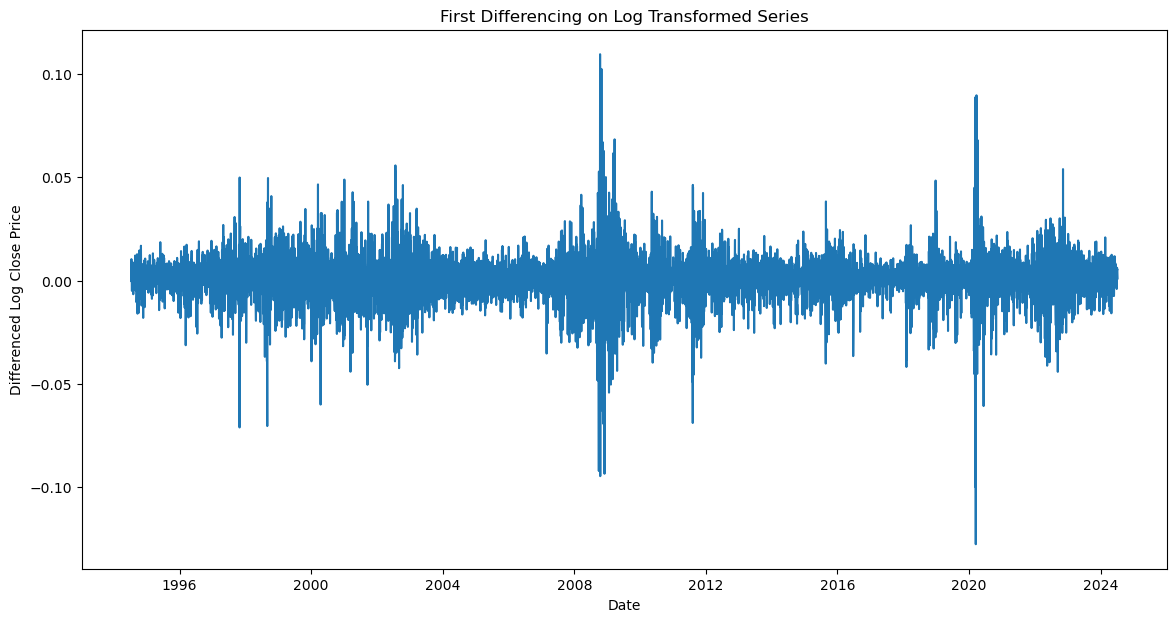

ADF Statistic (Log First Differenced): -16.022288880205604
p-value (Log First Differenced): 6.18545322379131e-29


In [18]:
#log transform the series
sp500_df['Close_log'] = np.log(sp500_df['Close'])

#plot log-transformed series
plt.figure(figsize=(14, 7))
plt.plot(sp500_df['Close_log'])
plt.title('Log Transformed Close Price')
plt.xlabel('Date')
plt.ylabel('Log Close Price')
plt.show()

#first differencing on log-transformed series
sp500_df['Close_log_diff1'] = sp500_df['Close_log'].diff()
data_log_diff1 = sp500_df['Close_log_diff1'].dropna()

#plot log-transformed and differenced series
plt.figure(figsize=(14, 7))
plt.plot(data_log_diff1)
plt.title('First Differencing on Log Transformed Series')
plt.xlabel('Date')
plt.ylabel('Differenced Log Close Price')
plt.show()

#check stationarity
adf_test_log_diff1 = adfuller(data_log_diff1)
print('ADF Statistic (Log First Differenced):', adf_test_log_diff1[0])
print('p-value (Log First Differenced):', adf_test_log_diff1[1])


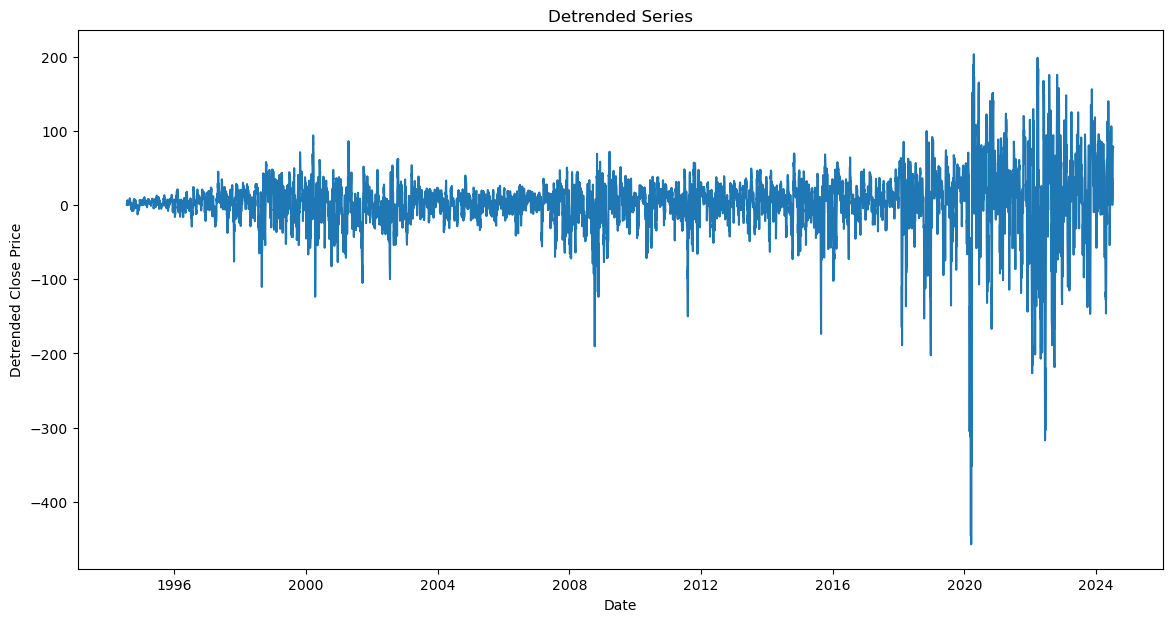

ADF Statistic (Detrended): -14.584441362498884
p-value (Detrended): 4.4150763820665574e-27


In [19]:
#detrending by subtracting the rolling mean
rolling_mean = sp500_df['Close'].rolling(window=12).mean()
sp500_df['Close_detrend'] = sp500_df['Close'] - rolling_mean

#drop missing values
data_detrend = sp500_df['Close_detrend'].dropna()

#plot detrended series
plt.figure(figsize=(14, 7))
plt.plot(data_detrend)
plt.title('Detrended Series')
plt.xlabel('Date')
plt.ylabel('Detrended Close Price')
plt.show()

#check stationarity
adf_test_detrend = adfuller(data_detrend)
print('ADF Statistic (Detrended):', adf_test_detrend[0])
print('p-value (Detrended):', adf_test_detrend[1])


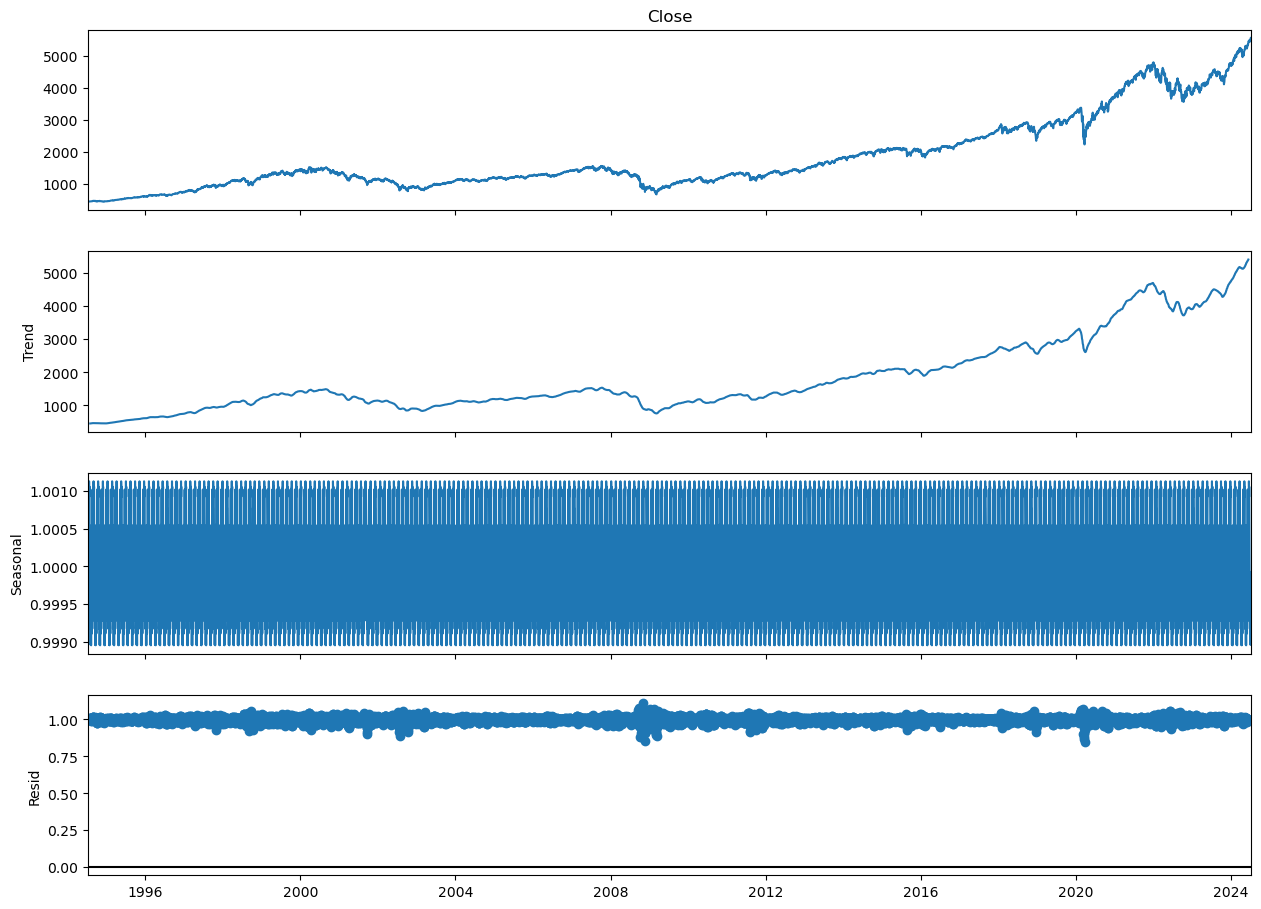

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose

#decompose the time series
decomposition = seasonal_decompose(sp500_df['Close'], model='multiplicative', period=30)

#plot the decomposed components
fig = decomposition.plot()
fig.set_size_inches(14, 10)
plt.show()

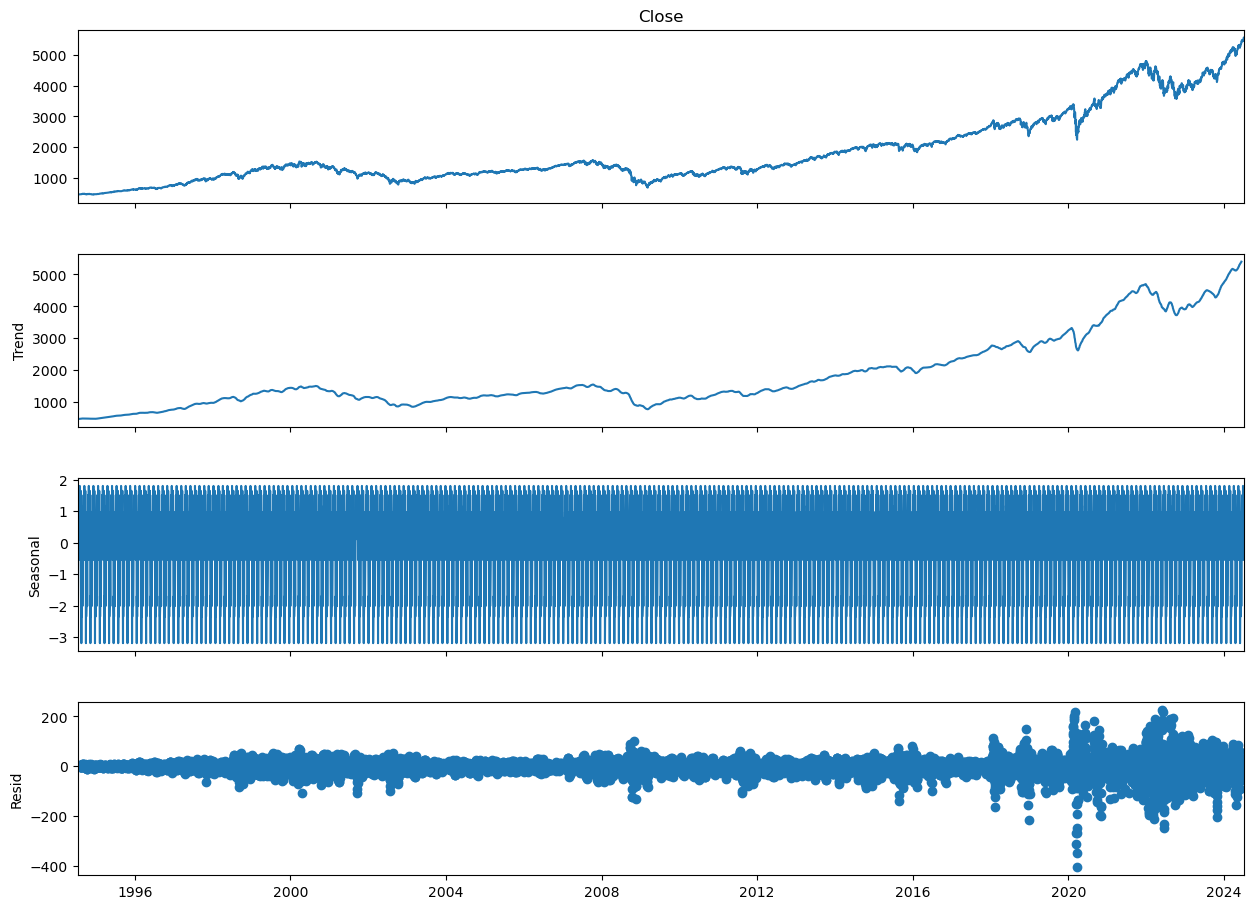

In [21]:
#decompose the time series
decomposition = seasonal_decompose(sp500_df['Close'], model='additive', period=30)

#plot the decomposed components
fig = decomposition.plot()
fig.set_size_inches(14, 10)
plt.show()

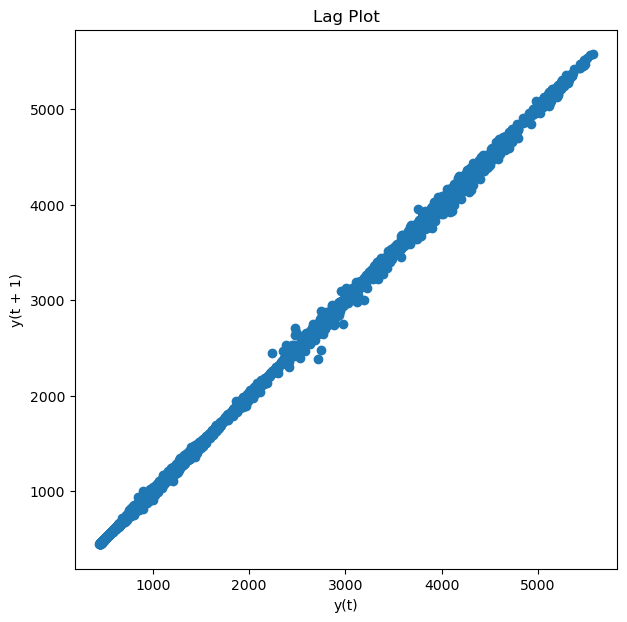

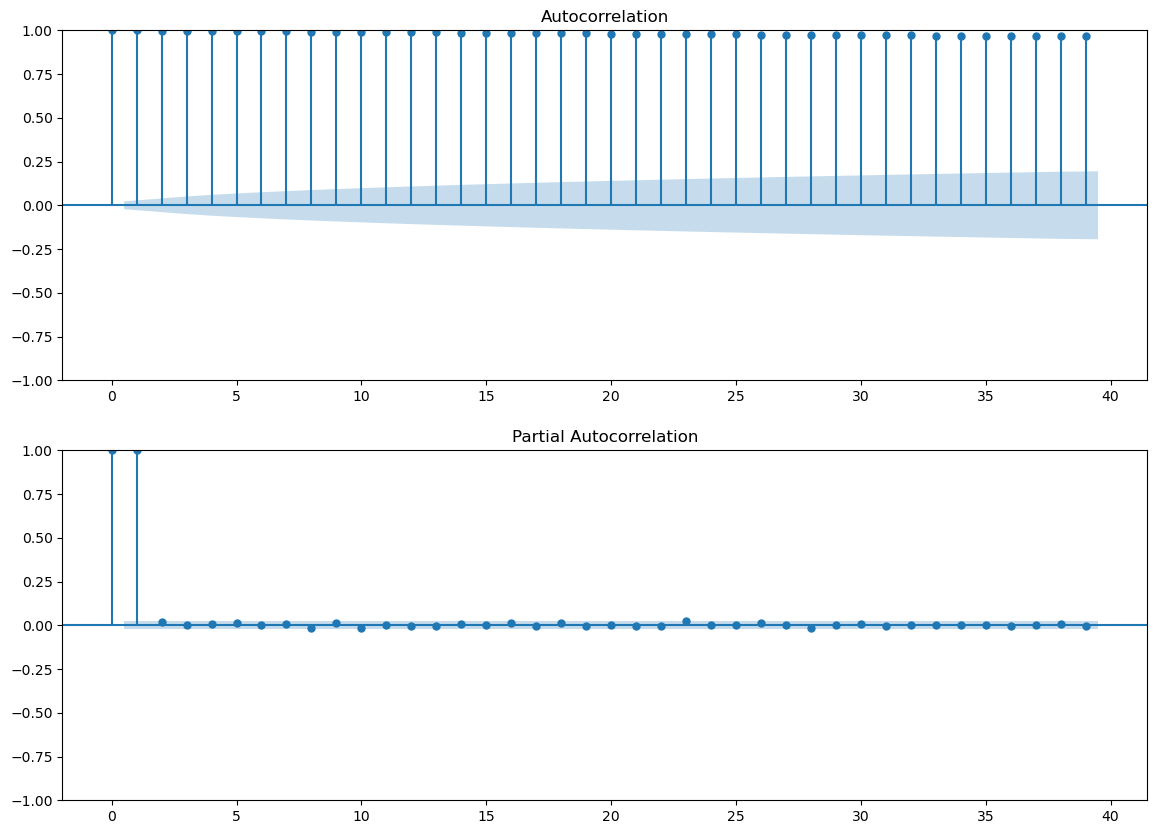

In [22]:
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#lag plot
plt.figure(figsize=(7, 7))
lag_plot(sp500_df['Close'])
plt.title('Lag Plot')
plt.show()

#ACF and PACF plots
fig, ax = plt.subplots(2, 1, figsize=(14, 10))
plot_acf(sp500_df['Close'], ax=ax[0])
plot_pacf(sp500_df['Close'], ax=ax[1])
plt.show()

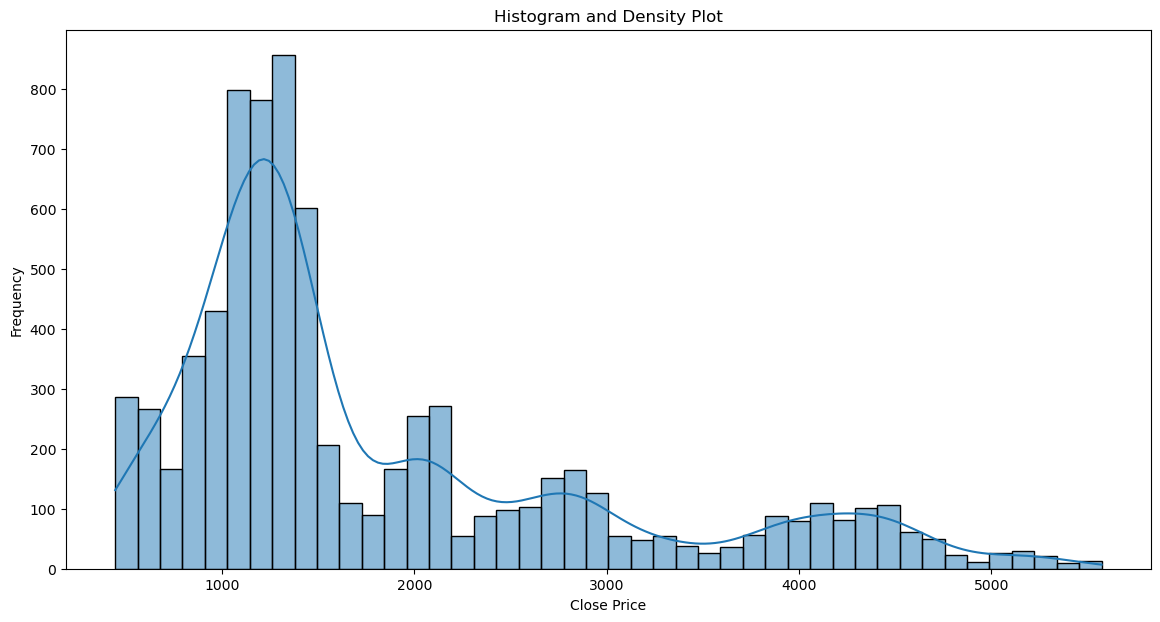

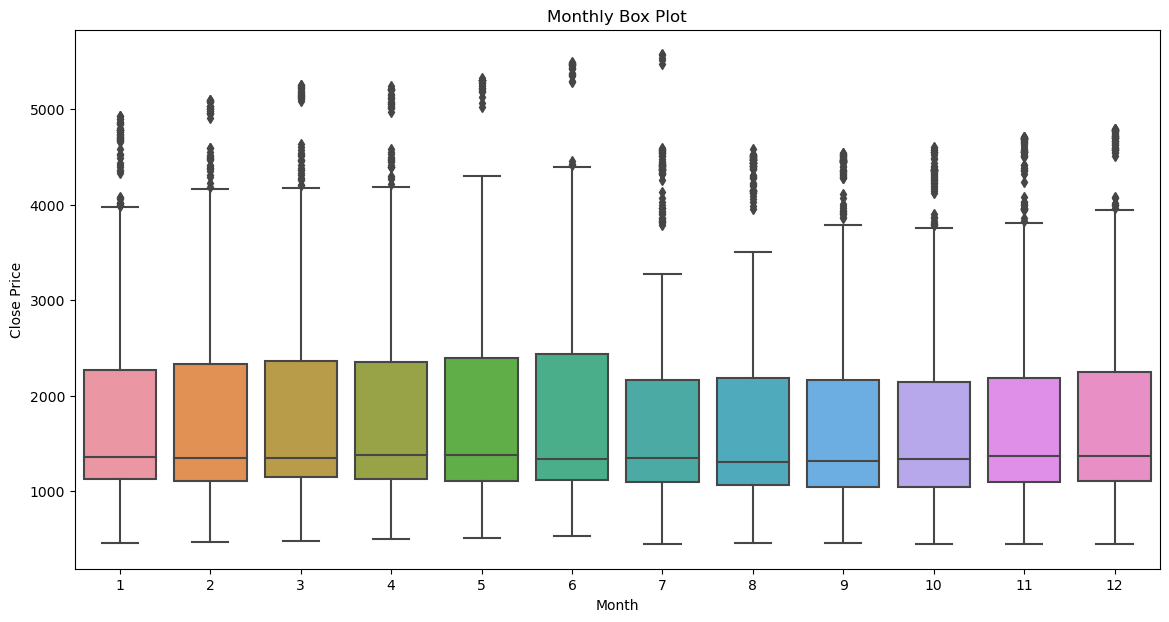

In [23]:
import seaborn as sns

#histogram and density plot
plt.figure(figsize=(14, 7))
sns.histplot(sp500_df['Close'], kde=True)
plt.title('Histogram and Density Plot')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.show()

#box plot
plt.figure(figsize=(14, 7))
sns.boxplot(x=sp500_df.index.month, y=sp500_df['Close'])
plt.title('Monthly Box Plot')
plt.xlabel('Month')
plt.ylabel('Close Price')
plt.show()


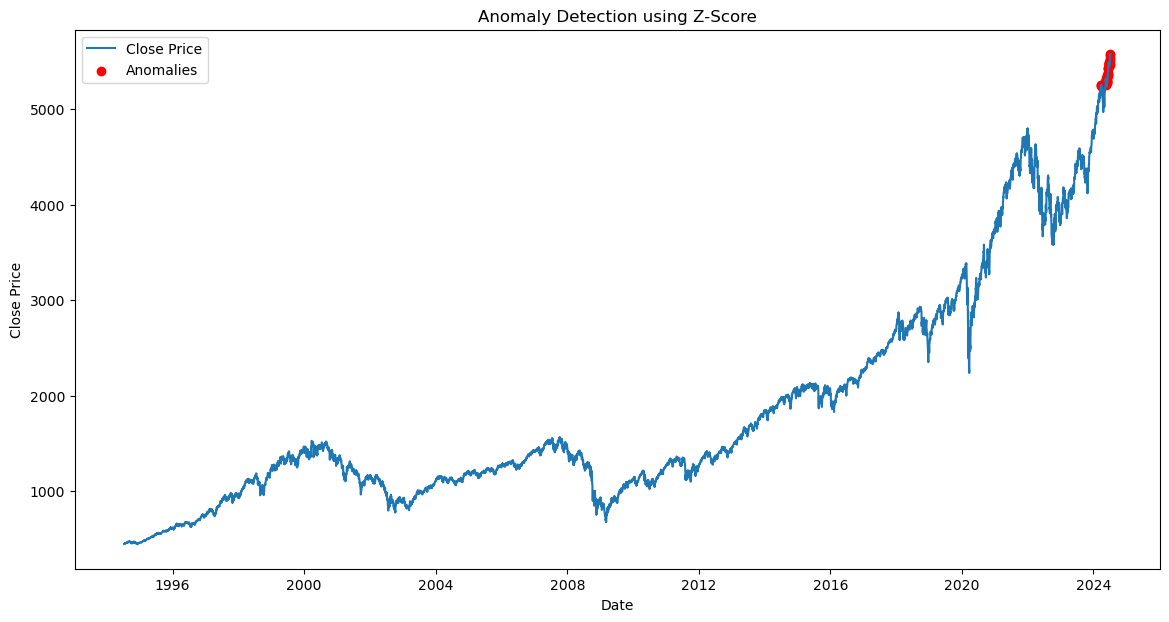

In [24]:
#Z-Score for anomaly detection
sp500_df['Z-Score'] = (sp500_df['Close'] - sp500_df['Close'].mean()) / sp500_df['Close'].std()
anomalies = sp500_df[abs(sp500_df['Z-Score']) > 3]

#plot anomalies
plt.figure(figsize=(14, 7))
plt.plot(sp500_df['Close'], label='Close Price')
plt.scatter(anomalies.index, anomalies['Close'], color='red', label='Anomalies')
plt.title('Anomaly Detection using Z-Score')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()



In [25]:
#extract date features
sp500_df['Year'] = sp500_df.index.year
sp500_df['Month'] = sp500_df.index.month
sp500_df['Day'] = sp500_df.index.day
sp500_df['DayOfWeek'] = sp500_df.index.dayofweek

#create lag features
sp500_df['Lag1'] = sp500_df['Close'].shift(1)
sp500_df['Lag2'] = sp500_df['Close'].shift(2)
sp500_df['Lag3'] = sp500_df['Close'].shift(3)

#create rolling statistics features
sp500_df['RollingMean_30'] =sp500_df['Close'].rolling(window=30).mean()
sp500_df['RollingStd_30'] = sp500_df['Close'].rolling(window=30).std()

#drop missing values generated by lag and rolling features
sp500_df.dropna(inplace=True)

/Users/nikhilkunapareddy/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nikhilkunapareddy/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nikhilkunapareddy/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Mean Absolute Error: 1029.0980312801266
Root Mean Squared Error: 1261.2956583357022


/Users/nikhilkunapareddy/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/nikhilkunapareddy/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


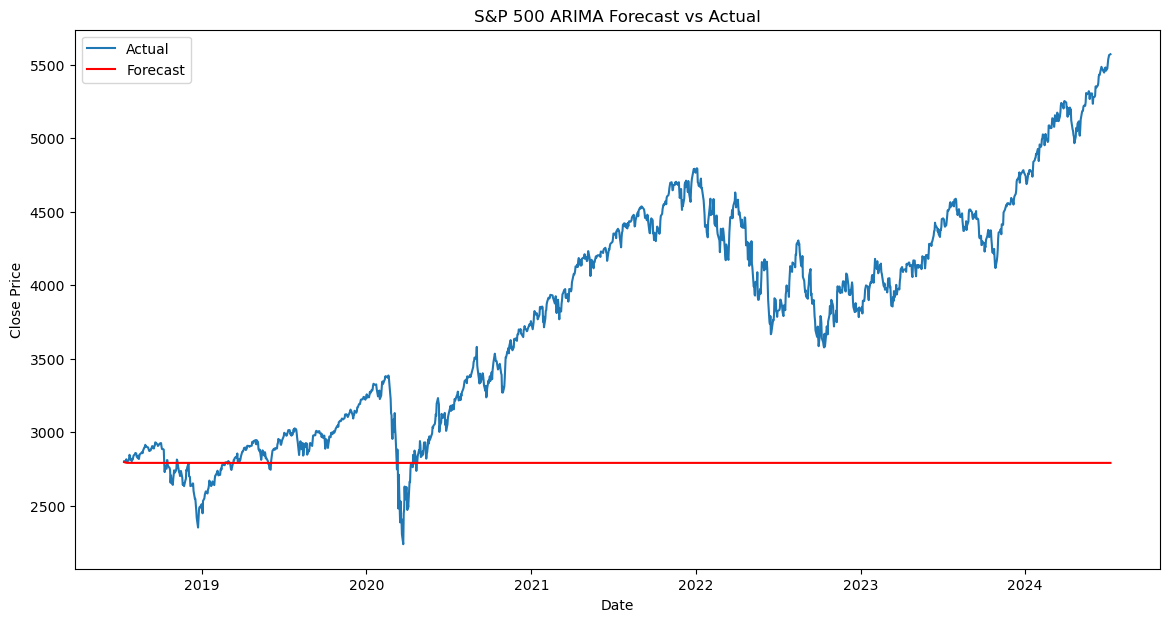

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

#calculate MAE and RMSE
train_size = int(len(sp500_df) * 0.8)
train, test = sp500_df['Close'][:train_size], sp500_df['Close'][train_size:]

#fit the model on training data
model = ARIMA(train, order=(1, 1, 5))
fitted_model = model.fit()

#forecast on the test data
forecast = fitted_model.forecast(steps=len(test))

#calculate MAE and RMSE
mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))

print('Mean Absolute Error:', mae)
print('Root Mean Squared Error:', rmse)

#plot the forecast vs actual values
plt.figure(figsize=(14, 7))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, forecast, label='Forecast', color='red')
plt.title('S&P 500 ARIMA Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

/Users/nikhilkunapareddy/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/nikhilkunapareddy/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/Users/nikhilkunapareddy/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nikhilkunapareddy/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequ

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.20166D+00    |proj g|=  6.46904D-02

At iterate    5    f=  4.12873D+00    |proj g|=  5.15560D-02

At iterate   10    f=  4.08035D+00    |proj g|=  7.83656D-04

At iterate   15    f=  4.07998D+00    |proj g|=  9.61284D-03

At iterate   20    f=  4.07972D+00    |proj g|=  4.43810D-04

At iterate   25    f=  4.07972D+00    |proj g|=  1.11324D-03

At iterate   30    f=  4.07969D+00    |proj g|=  2.06177D-03

At iterate   35    f=  4.07968D+00    |proj g|=  2.54842D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

/Users/nikhilkunapareddy/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/nikhilkunapareddy/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


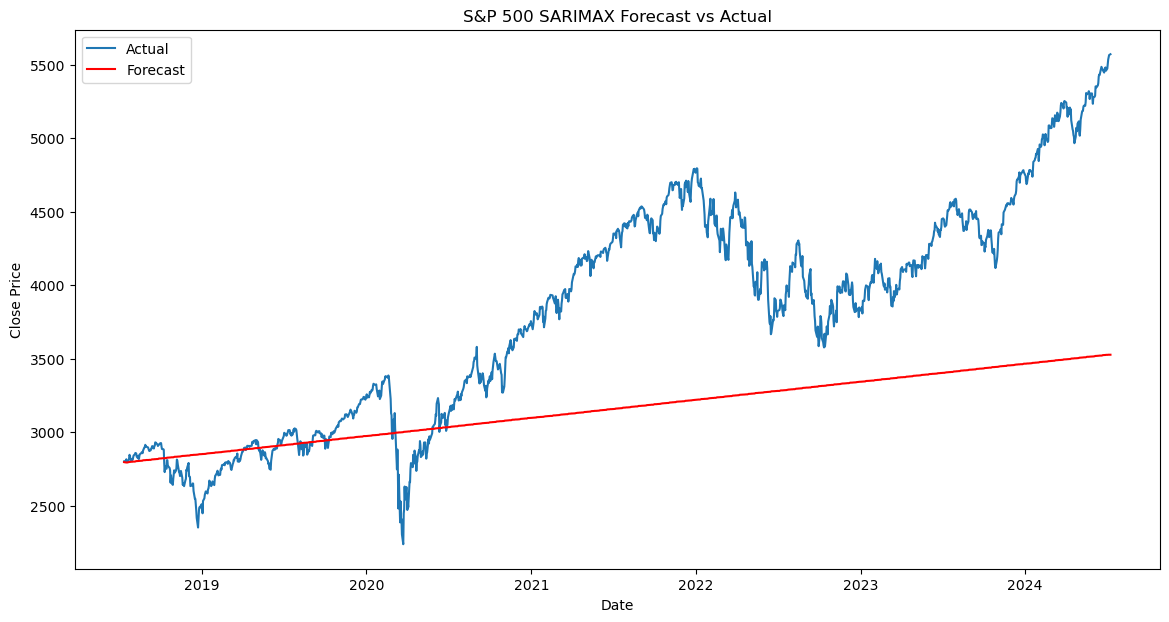

In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy as np

p, d, q = 1, 1, 1
P, D, Q, s = 1, 1, 1, 12
#forecasting
forecast_steps = 30  # Number of steps to forecast
forecast = fitted_model.get_forecast(steps=forecast_steps).predicted_mean


#evaluate the model using MAE and RMSE
train_size = int(len(sp500_df) * 0.8)
train, test = sp500_df['Close'][:train_size], sp500_df['Close'][train_size:]

#fit the model on training data
model = SARIMAX(train, order=(p, d, q), seasonal_order=(P, D, Q, s))
fitted_model = model.fit()

#forecast on the test data
forecast = fitted_model.get_forecast(steps=len(test)).predicted_mean

#calculate MAE and RMSE
mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))

print('Mean Absolute Error:', mae)
print('Root Mean Squared Error:', rmse)

#plot the forecast vs actual values
plt.figure(figsize=(14, 7))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, forecast, label='Forecast', color='red')
plt.title('S&P 500 SARIMAX Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()
